In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/mall-customers/Mall_Customers.csv


In [2]:
df=pd.read_csv("/kaggle/input/mall-customers/Mall_Customers.csv")

# **1-Data Overview**

In [3]:
import matplotlib.pyplot as plt

import seaborn as sns

In [4]:
df.head()


,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [5]:
df.shape

(200, 5)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Genre                   200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [7]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [8]:
df.duplicated().sum()

0

# **2-EDA**

In [9]:
df.dtypes

CustomerID                 int64
Genre                     object
Age                        int64
Annual Income (k$)         int64
Spending Score (1-100)     int64
dtype: object

In [10]:
df.isna().sum()

CustomerID                0
Genre                     0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [11]:
df.columns

Index(['CustomerID', 'Genre', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)'],
      dtype='object')

Text(0.5, 1.0, 'Scatter Plot of Spending Score vs. Annual Income (k$)')

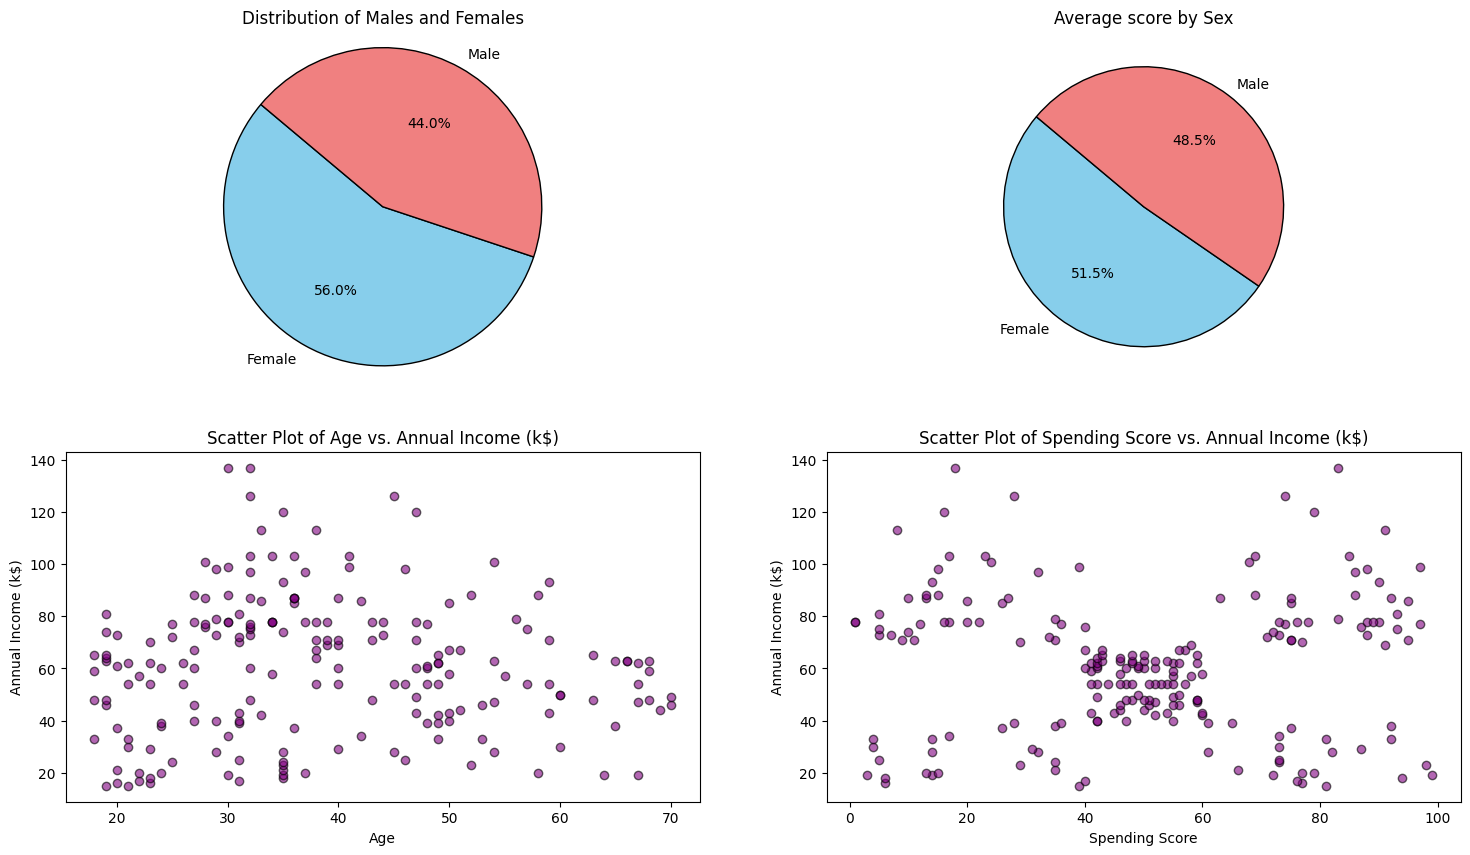

In [12]:
%matplotlib inline
count=df.Genre.value_counts()
fig, axes = plt.subplots(2, 2, figsize=(18, 10))

axes[0,0].pie(count,labels=count.index,autopct='%1.1f%%',
    colors=['skyblue', 'lightcoral'],
    startangle=140,
    wedgeprops={'edgecolor': 'black'}
)
axes[0, 0].set_title('Distribution of Males and Females')
axes[0, 0].axis('equal')

score_by_sex=df.groupby('Genre')["Spending Score (1-100)"].mean()
axes[0,1].pie(score_by_sex,labels=score_by_sex.index,autopct='%1.1f%%',
    colors=['skyblue', 'lightcoral'],
    startangle=140,
    wedgeprops={'edgecolor': 'black'})
axes[0, 1].set_title('Average score by Sex')


axes[1,0].scatter(df['Age'], df['Annual Income (k$)'], color='purple', alpha=0.6, edgecolor='k')
axes[1, 0].set_xlabel('Age')
axes[1, 0].set_ylabel('Annual Income (k$)')
axes[1, 0].set_title('Scatter Plot of Age vs. Annual Income (k$)')


axes[1, 1].scatter(df['Spending Score (1-100)'], df['Annual Income (k$)'], color='purple', alpha=0.6, edgecolor='k')
axes[1, 1].set_xlabel('Spending Score')
axes[1, 1].set_ylabel('Annual Income (k$)')
axes[1, 1].set_title('Scatter Plot of Spending Score vs. Annual Income (k$)')

# **3-Ml**

**K-Means**

/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:8

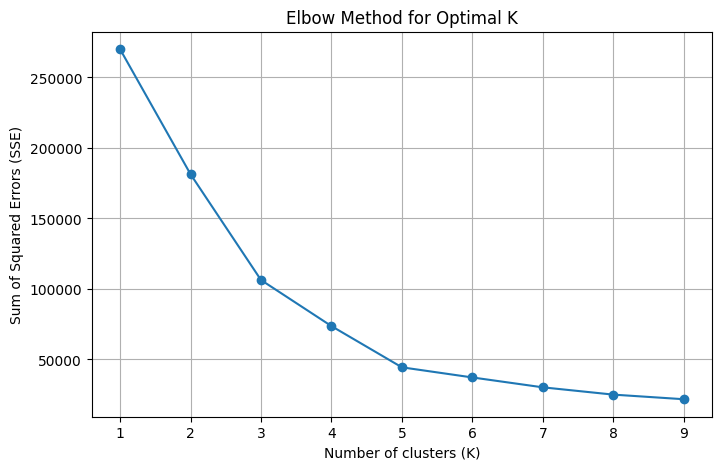

In [13]:
from sklearn.cluster import KMeans
X=df[['Annual Income (k$)','Spending Score (1-100)']]
X = np.array(X)
sse = []
k_rng = range(1, 10)
for k in k_rng:
    km = KMeans(n_clusters=k, random_state=0)
    km.fit(X)
    sse.append(km.inertia_)

# Plot the Elbow Method graph
plt.figure(figsize=(8, 5))
plt.plot(k_rng, sse, marker='o')
plt.xlabel('Number of clusters (K)')
plt.ylabel('Sum of Squared Errors (SSE)')
plt.title('Elbow Method for Optimal K')
plt.grid(True)
plt.show()



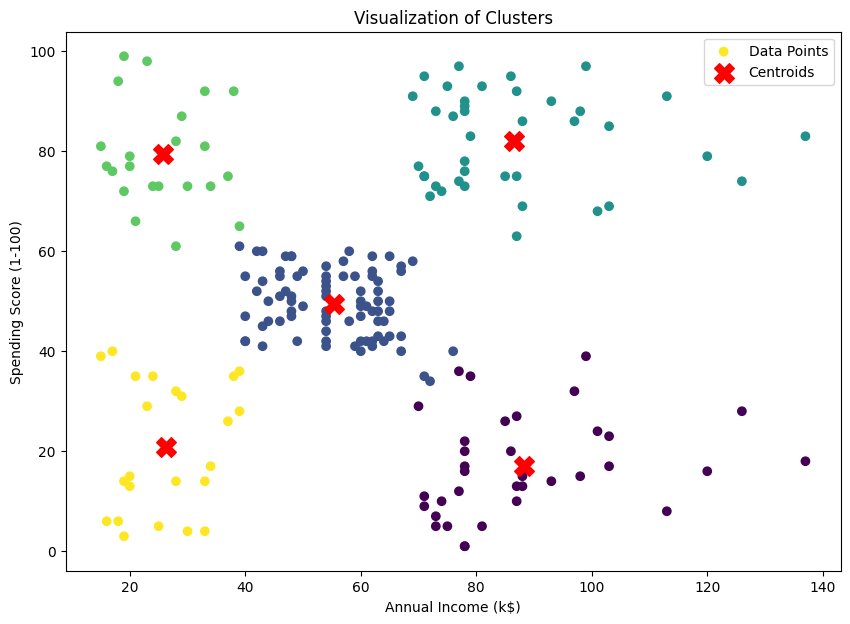

In [14]:
# Step 2: Fit the KMeans model with the chosen number of clusters (based on elbow method graph)
kmeans = KMeans(n_clusters=5, random_state=0, n_init="auto").fit(X)
y_predicted = kmeans.fit_predict(X)

# Add cluster labels to your dataframe
df["Km_cluster"] = y_predicted
df.head()

# Step 3: Visualize the Clusters
plt.figure(figsize=(10, 7))
plt.scatter(X[:, 0], X[:, 1], c=y_predicted, cmap='viridis', label='Data Points')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=200, c='red', marker='X', label='Centroids')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.title('Visualization of Clusters')
plt.legend()
plt.show()


In [15]:
df.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100),Km_cluster
0,1,Male,19,15,39,4
1,2,Male,21,15,81,3
2,3,Female,20,16,6,4
3,4,Female,23,16,77,3
4,5,Female,31,17,40,4


In [16]:
from sklearn.metrics import silhouette_score

score = silhouette_score(X, y_predicted)
print(f'Silhouette Score: {score}')


Silhouette Score: 0.553931997444648


**Hierarchical Clustering**

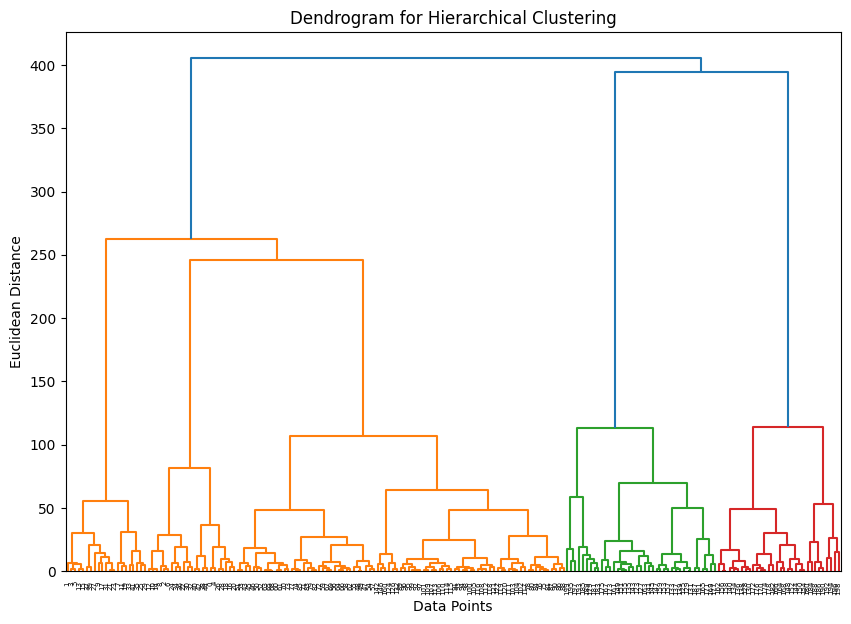

In [17]:
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import AgglomerativeClustering


# Step 2: Calculate the linkage matrix for the Dendrogram
linked = linkage(X, method='ward')

# Step 3: Plot the Dendrogram to visualize the hierarchical clustering
plt.figure(figsize=(10, 7))
dendrogram(linked,
           orientation='top',
           distance_sort='ascending',
           show_leaf_counts=True)
plt.title('Dendrogram for Hierarchical Clustering')
plt.xlabel('Data Points')
plt.ylabel('Euclidean Distance')
plt.show()



/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


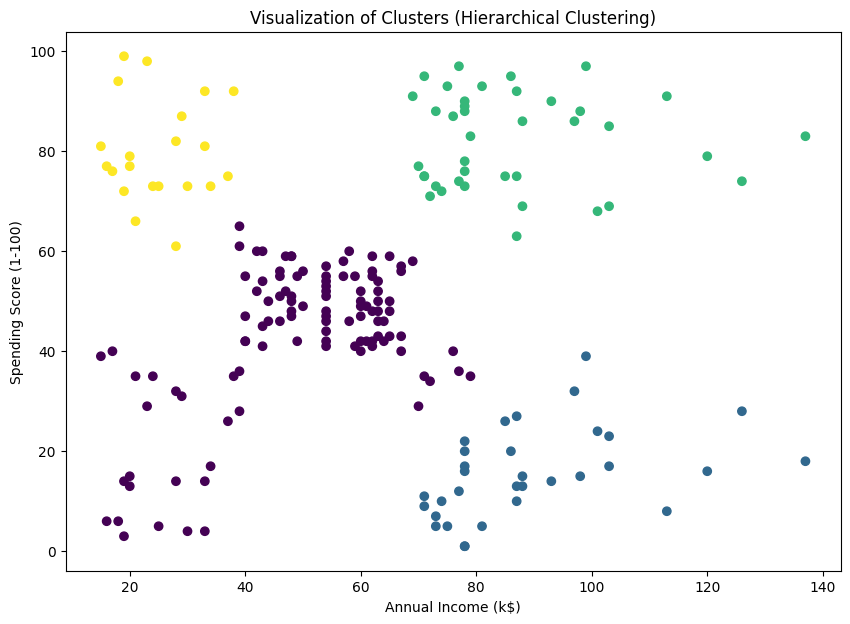

In [18]:

n_clusters = 4
hierarchical_clustering = AgglomerativeClustering(n_clusters=n_clusters, affinity='euclidean', linkage='ward')
y_hc = hierarchical_clustering.fit_predict(X)
df["HC_cluster"] = y_hc
# Step 5: Visualize the Clusters
plt.figure(figsize=(10, 7))
plt.scatter(X[:, 0], X[:, 1], c=y_hc, cmap='viridis', label='Data Points')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.title('Visualization of Clusters (Hierarchical Clustering)')
plt.show()

In [19]:
from sklearn.metrics import silhouette_score

score = silhouette_score(X, y_hc)
print(f'Silhouette Score: {score}')


Silhouette Score: 0.4916598193892782


**DbScan**

In [20]:
from sklearn.cluster import DBSCAN

# eps: The maximum distance between two samples for one to be considered as in the neighborhood of the other.
# min_samples: The number of samples in a neighborhood for a point to be considered a core point.
dbscan = DBSCAN(eps=0.5,min_samples=2) 
y_db = dbscan.fit_predict(X)
df["Db_cluster"] = y_db

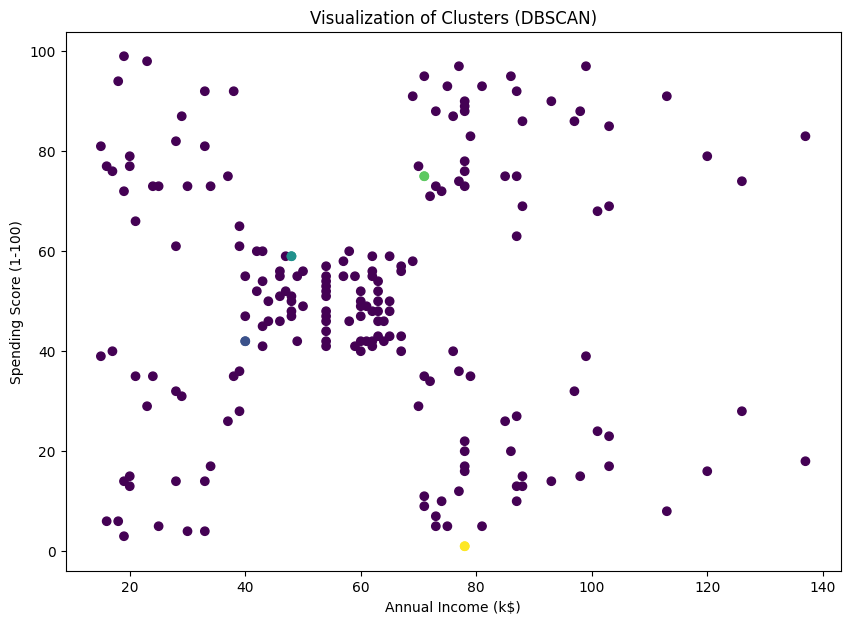

In [21]:
plt.figure(figsize=(10, 7))
plt.scatter(X[:, 0], X[:, 1], c=y_db, cmap='viridis', label='Data Points')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.title('Visualization of Clusters (DBSCAN)')
plt.show()

In [22]:
score = silhouette_score(X, y_db)
print(f'Silhouette Score: {score}')


Silhouette Score: -0.5037755483679244


#### > the best model untill now is Kmeans

In [23]:
df[df.Db_cluster>-1]#Db_cluster =-1 labels points that do not belong to any cluster as noise 

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100),Km_cluster,HC_cluster,Db_cluster
48,49,Female,29,40,42,1,0,0
49,50,Female,31,40,42,1,0,0
65,66,Male,18,48,59,1,0,1
68,69,Male,19,48,59,1,0,1
129,130,Male,38,71,75,2,2,2
131,132,Male,39,71,75,2,2,2
156,157,Male,37,78,1,0,1,3
158,159,Male,34,78,1,0,1,3
